In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
#np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# chen = Sampler()

# sample = chen.get_samples(size=100)
# sample = chen.get_samples(size=500, pristine=True)
# sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
# columns = "t_form tau t_trun tau_trun t_burst t_ext".split()
# sample[columns] = sample[columns].apply(log10)
# sample.head(n=10)

# g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)
# g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
# g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": (0.1, 0.1)})
# g.map_diag(sns.kdeplot, lw=2, legend=False)

In [3]:
%%time
library = iSSAG(size=1000)
library.set_all_SEDs()

CPU times: user 20min 16s, sys: 1.93 s, total: 20min 18s
Wall time: 20min 31s


In [4]:
library.sample.head(n=20)

,t_form,gamma,truncated,t_trun,tau_trun,t_burst,t_ext,A,Z,tau_V,mu_V,sigma_v
0,2.967892e+09,0.762339,False,NaN,NaN,2.114343e+09,2.401172e+08,0.069098,2.367987,1.489720,0.914625,140.357743
1,2.118674e+09,0.000580,False,NaN,NaN,2.015444e+09,1.890338e+08,3.767455,0.328500,0.824761,0.538337,329.696013
2,3.102414e+09,0.749128,False,NaN,NaN,3.046897e+09,2.419382e+08,0.059760,0.667455,0.614779,0.022936,90.891284
3,1.295354e+10,0.276104,False,NaN,NaN,9.898787e+09,1.209764e+08,0.138720,0.406266,1.374196,0.581635,161.431970
4,3.764562e+09,0.216385,True,3.748682e+09,9.311520e+08,1.206243e+09,2.462422e+08,2.047694,1.441784,0.253024,0.092185,59.805980
5,1.315992e+10,0.863036,True,3.880270e+09,4.707255e+07,1.057573e+10,2.882064e+08,0.527395,0.081058,0.811633,0.440066,349.533426
6,3.189024e+09,0.057985,True,2.025600e+08,2.212492e+08,2.804895e+09,2.323966e+08,1.209995,1.825957,1.181147,0.506352,153.211574
7,5.840906e+09,0.979237,False,NaN,NaN,2.649013e+09,2.582781e+08,0.050687,2.193819,1.907478,0.223267,304.028921
8,1.319084e+10,0.818165,False,NaN,NaN,1.030410e+10,5.903951e+07,0.089335,2.303673,0.831878,0.663604,280.859768
9,6.247632e+09,0.953748,False,NaN,NaN,2.015214e+09,2.405738e+08,0.303329,0.746211,0.273790,0.792691,396.485420


In [5]:
# for i in xrange(10):
#     mask = library.SFHs[i]>0.0#np.ones(library.SFHs[i].size, dtype=bool)#
#     figure()
#     library.SFHs[i][mask].plot()

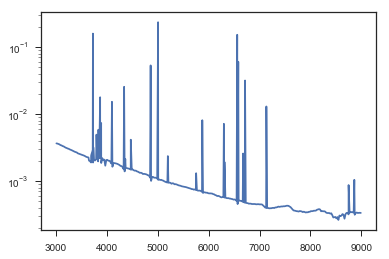

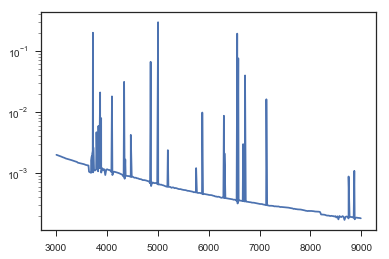

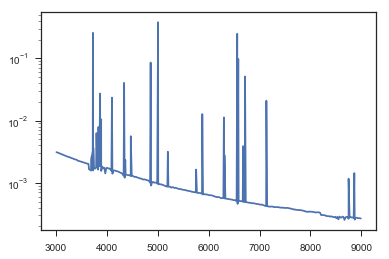

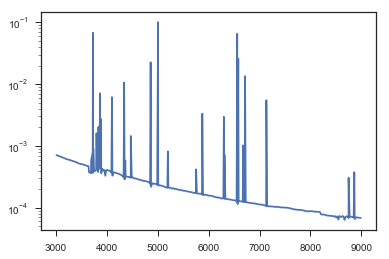

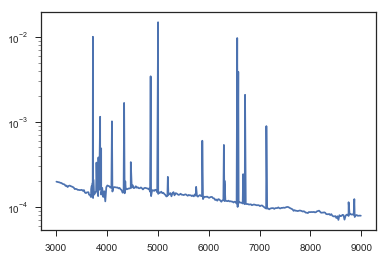

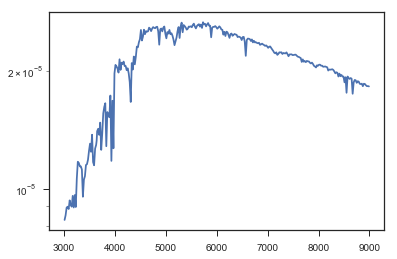

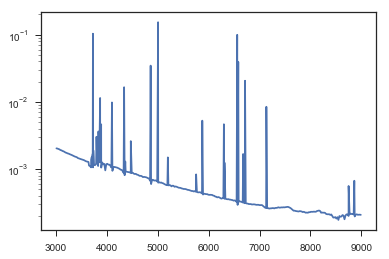

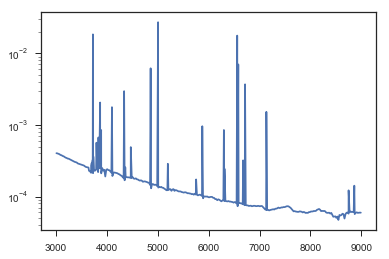

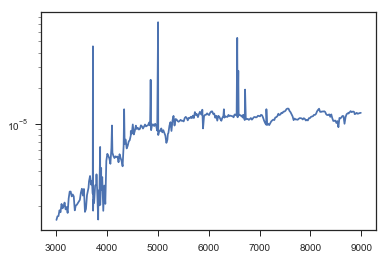

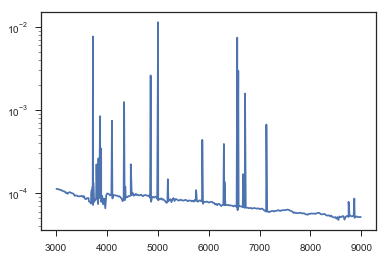

In [6]:
for i in xrange(10):
    mask = (3000 <= library.SEDs[i].index)&(library.SEDs[i].index <= 9000)
    figure()
    library.SEDs[i][mask].plot()
    gca().set_yscale("log")